In [2]:
# import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [5]:
#Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4e87ac0b243f4c25ba10049e28d9e03d


In [9]:
#Create an empty list to hold the weather data.
city_data = []

#print the begining of the logging.
print('Beginning Data Retrieval   ')
print("---------------------------")

#Create counters.
record_count = 1
set_count = 1

#loop through all the cities in our list.
for i, city in enumerate(cities):
    #Group cities in sets for logging purposes.
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count += 1
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | ponta do sol
Processing Record 4 of Set 1 | nchelenge
Processing Record 5 of Set 1 | antofagasta
Processing Record 6 of Set 1 | batemans bay
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | kununurra
Processing Record 12 of Set 1 | zachary
Processing Record 13 of Set 1 | vestmannaeyjar
Processing Record 14 of Set 1 | zaria
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | kavaratti
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | rio grande
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | tuscaloosa
Processing Record 22 of Set 1 | amderma
City n

In [20]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,53.60,35,40,14.97,AR,2021-04-15 18:56:15
1,Bethel,41.3712,-73.4140,51.01,96,100,1.01,US,2021-04-15 18:56:16
2,Ponta Do Sol,32.6667,-17.1000,66.20,68,40,11.50,PT,2021-04-15 18:56:16
3,Nchelenge,-9.3451,28.7340,70.34,86,100,5.86,ZM,2021-04-15 18:56:16
4,Antofagasta,-23.6500,-70.4000,66.20,63,20,11.50,CL,2021-04-15 18:53:32
5,Batemans Bay,-35.7167,150.1833,57.00,76,82,3.00,AU,2021-04-15 18:56:17
6,Rikitea,-23.1203,-134.9692,77.86,74,58,7.63,PF,2021-04-15 18:56:17
7,Mataura,-46.1927,168.8643,50.00,95,48,3.00,NZ,2021-04-15 18:56:17
8,Kapaa,22.0752,-159.3190,72.00,78,75,12.66,US,2021-04-15 18:56:07
9,Airai,-8.9266,125.4092,56.21,80,86,1.83,TL,2021-04-15 18:56:18


In [21]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
# Reorder dataframe
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-04-15 18:56:15,-54.8000,-68.300,53.60,35,40,14.97
1,Bethel,US,2021-04-15 18:56:16,41.3712,-73.414,51.01,96,100,1.01
2,Ponta Do Sol,PT,2021-04-15 18:56:16,32.6667,-17.100,66.20,68,40,11.50
3,Nchelenge,ZM,2021-04-15 18:56:16,-9.3451,28.734,70.34,86,100,5.86
4,Antofagasta,CL,2021-04-15 18:53:32,-23.6500,-70.400,66.20,63,20,11.50


In [23]:
#Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [24]:
#Extract relevant fields from the Dataframe for plottting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

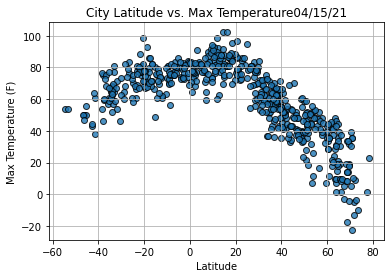

In [28]:
#Import the time module
import time
#Build the scatter plot for latitude vs. max temp.
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha =0.8, label='Cities')
#Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperature' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig1.png')

#SHow plot
plt.show()

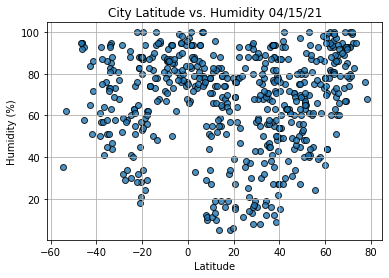

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

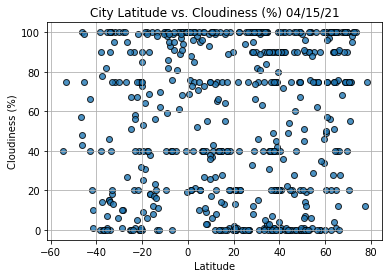

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

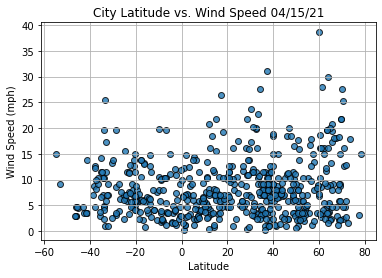

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [41]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

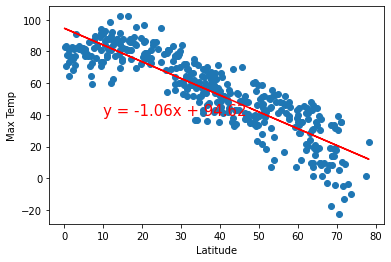

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

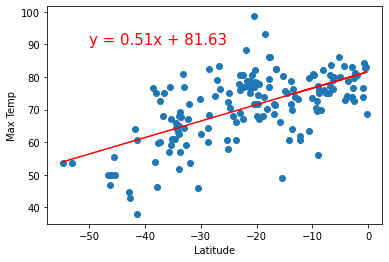

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

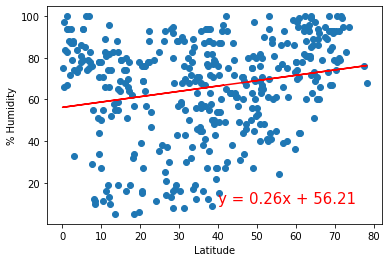

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

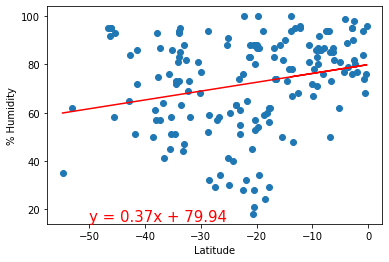

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

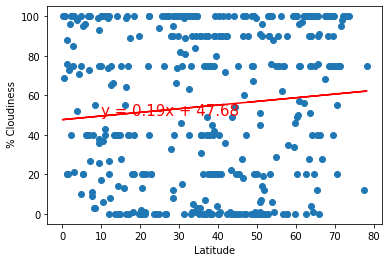

In [50]:
#Linear regression Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
#Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for % Cloudiness", " % Cloudiness", (10,50))

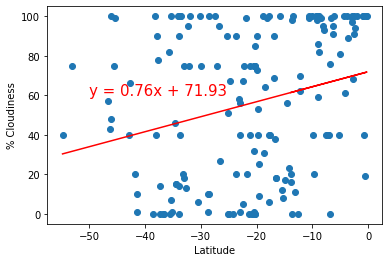

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

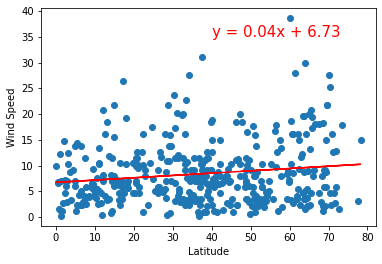

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

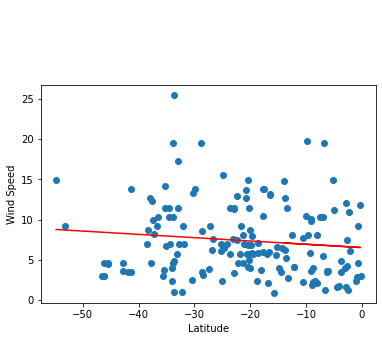

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))